**Import all the Libraries and data**

In [94]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
%matplotlib inline

In [95]:
titanic_train = pd.read_csv('https://raw.githubusercontent.com/Deepak1998Mittal/titanic/master/train.csv')
titanic_test = pd.read_csv('https://raw.githubusercontent.com/Deepak1998Mittal/titanic/master/test.csv')

In [96]:
titanic_train.shape

(891, 12)

In [97]:
titanic_test.shape

(418, 11)

In [137]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_end
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [99]:
titanic_test.head(2)                                   #testing set doesn't contain survived column which is to be predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [100]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [101]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
2+np.nan

nan

* The features having NaN value gives mean,std,etc all NaN 

In [103]:
titanic_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [104]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Heatmap for the dataset to determine the relation between features

*For more info:* https://seaborn.pydata.org/generated/seaborn.heatmap.html

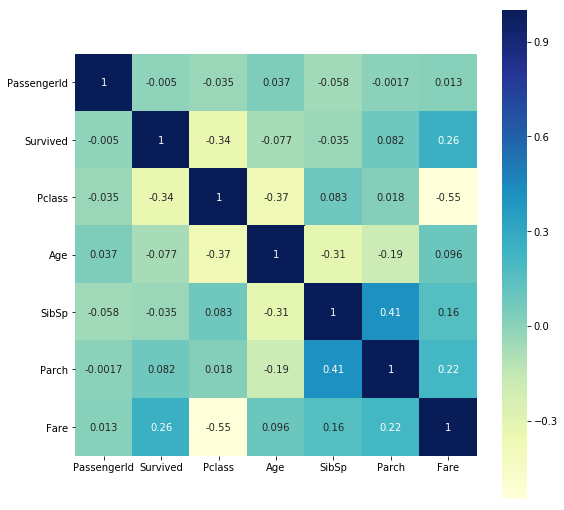

In [106]:
corr = titanic_train.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='YlGnBu')     # annot=True is use to write the corr value on the sq. box

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7517364E0>,
      dtype=object)

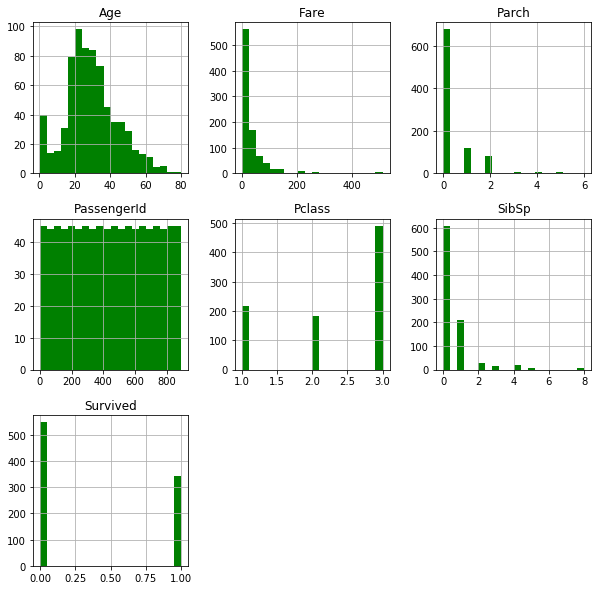

In [107]:
titanic_train.hist(bins=20,figsize=(10,10),grid=True,color='g')

**For more information related to seaborn.FacetGrid :** https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

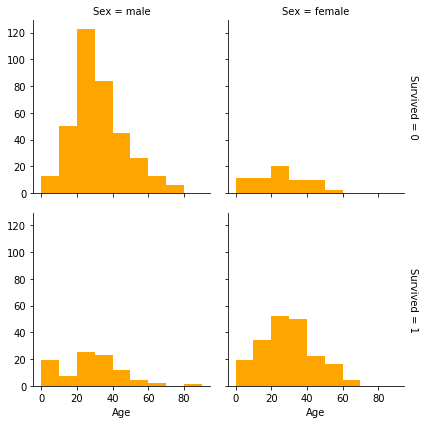

In [108]:
bins=np.arange(0,100,10)
g = sns.FacetGrid(titanic_train, col="Sex", row="Survived", margin_titles=True)   #Also,try with removing margin_titles=True
g.map(plt.hist, "Age",color="orange",bins=bins)

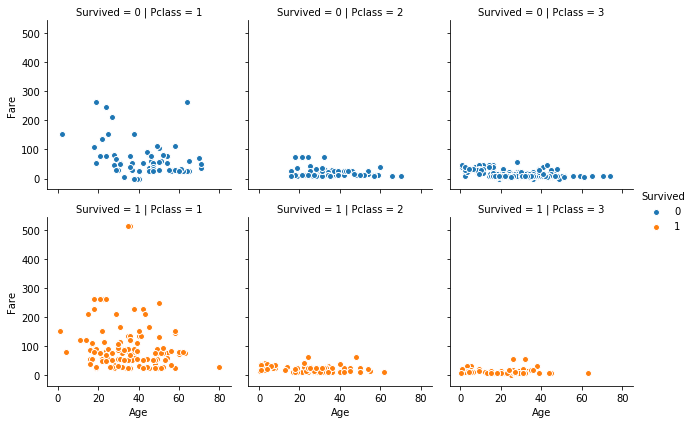

In [109]:
g=sns.FacetGrid(titanic_train,hue="Survived",row='Survived', col="Pclass")
g=g.map(plt.scatter,'Age','Fare',edgecolor='w').add_legend()

*To combine both the rows,remove the* **rows='Survived'**

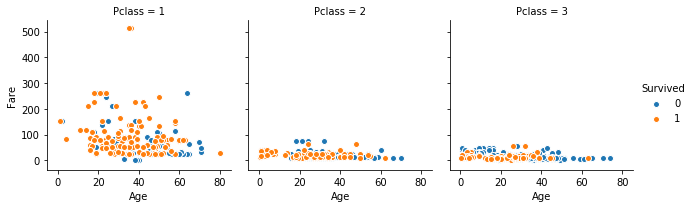

In [110]:
g=sns.FacetGrid(titanic_train,hue="Survived", col="Pclass")
g=g.map(plt.scatter,'Age','Fare',edgecolor='w').add_legend()

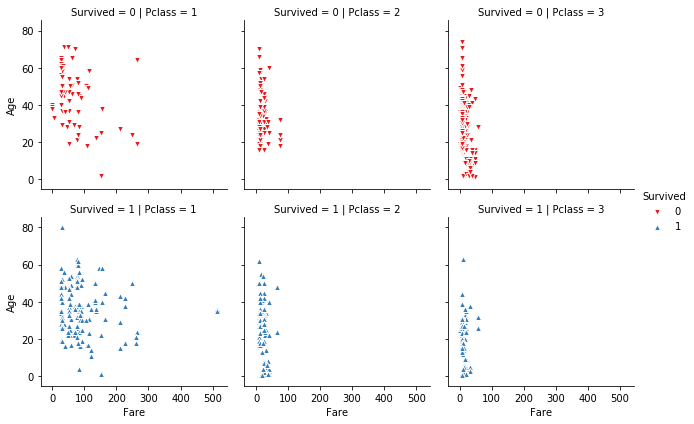

In [111]:
g=sns.FacetGrid(titanic_train,hue="Survived",row='Survived', col="Pclass",palette="Set1",hue_kws=dict(marker=["v","^"]))
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

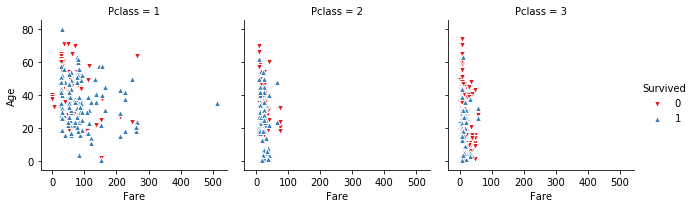

In [112]:
g=sns.FacetGrid(titanic_train,hue="Survived", col="Pclass",palette="Set1",hue_kws=dict(marker=["v","^"]))
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()

* for more info: https://seaborn.pydata.org/generated/seaborn.catplot.html

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


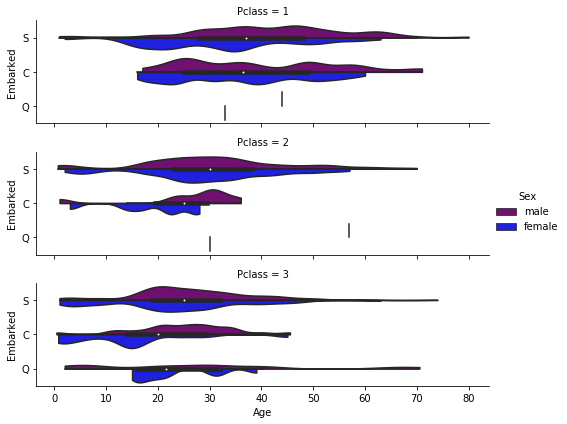

In [113]:
g = sns.catplot(x="Age", y="Embarked",hue="Sex", row="Pclass",data=titanic_train[titanic_train.Embarked.notnull()],orient="h",
                   size=2, aspect=3.5, palette={'male':"purple", 'female':"blue"},kind="violin", split=True, cut=0, bw=.2)

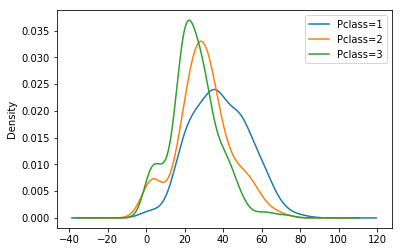

In [114]:
titanic_train['Age'][titanic_train['Pclass']==1].plot(kind='kde')
titanic_train['Age'][titanic_train['Pclass']==2].plot(kind='kde')
titanic_train['Age'][titanic_train['Pclass']==3].plot(kind='kde')
plt.legend(['Pclass=1','Pclass=2','Pclass=3'])

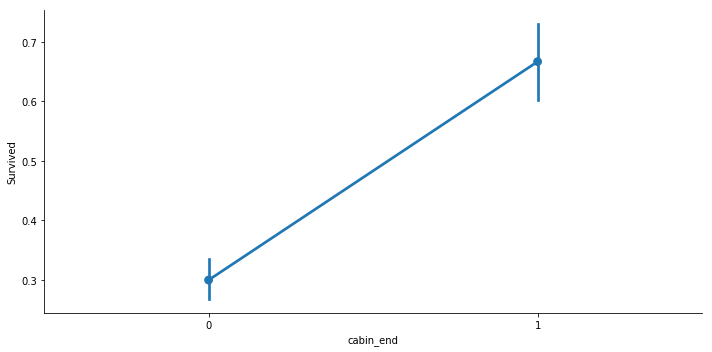

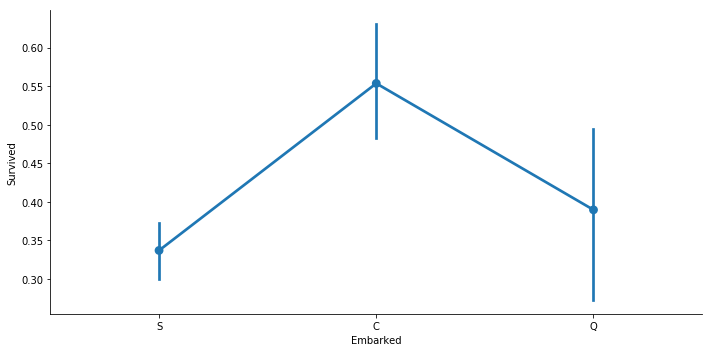

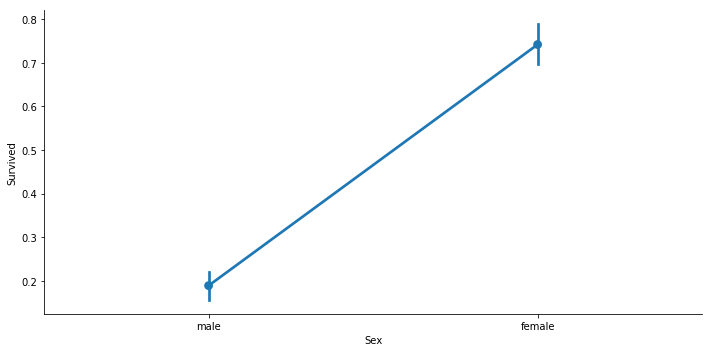

In [115]:
titanic_train['cabin_end'] = np.where(titanic_train['Cabin'].isnull(),0,1)
for index,col in enumerate(['cabin_end','Embarked','Sex']):
    #plt.figure(index)
    sns.catplot(x=col,y='Survived',data = titanic_train,kind='point',aspect=2)

* It is observed that people having assigned cabin are more likely to survive  
* It is observed that more females had survived than males
* It is possible that S board could have more males or less cabin assinged people than C board  
* The hypothesis that C board people survived more than S board can be solved by going through different parameter    
* **pivot_table** can be helpful to solve this problem

In [116]:
titanic_train[['Survived','cabin_end']].groupby(titanic_train['Cabin'].isnull()).mean()

,Survived,cabin_end
Cabin,,
False,0.666667,1
True,0.299854,0


* over 66% people survived with non-missing cabin while over 29% survived with missing cabins

In [117]:
titanic_train.pivot_table('Survived',index='Sex',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [118]:
titanic_train.pivot_table('Survived',index='cabin_end',columns='Embarked',aggfunc='count')

Embarked,C,Q,S
cabin_end,,,
0,99,73,515
1,69,4,129


It is observed that the people of C board is more likely to survived beacause-
* Their are more number of females and more assigned cabins than S board
* More females had survived and more assigned cabin people had survived

In [119]:
titanic_train.pivot_table('Survived',index='Pclass',columns='Embarked',aggfunc='count')#few people of Pclass 1,2 are for Q board

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


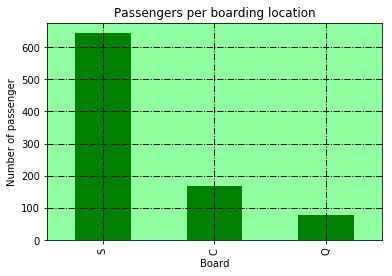

In [120]:
a=titanic_train['Embarked'].value_counts().plot(kind='bar',color='green')
plt.grid(color='black', linestyle='-.', linewidth=1)
plt.title("Passengers per boarding location")
plt.xlabel('Board')
plt.ylabel('Number of passenger')
a.set_facecolor('xkcd:mint green')

### Missing value(s) imputation

In [121]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
cabin_end        0
dtype: int64

* Missing Cabins has been filled with 0 and non-missing with 1

In [122]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_end
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


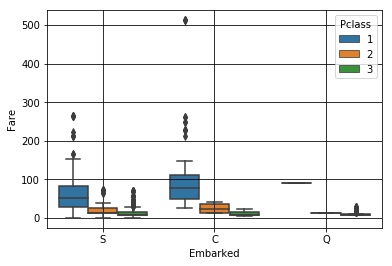

In [123]:
sns.boxplot(x='Embarked',y='Fare',hue='Pclass',data=titanic_train)
plt.grid(color='black')

The following conclusion can be drawn:
* According to the missing Embarked, both are of Pclass = 1
* According to boxplot, the median fare of Pclass = 1 is around 80$ for board C
* The missing Embarked should be fill with the board C 

In [124]:
titanic_train['Embarked']=titanic_train['Embarked'].fillna('C')

In [134]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
cabin_end        0
dtype: int64

In [136]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [126]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [127]:
fare = titanic_test[(titanic_test['Pclass']==3)&(titanic_test['Embarked']=='S')]['Fare'].median()

In [128]:
titanic_test['Fare']=titanic_test['Fare'].fillna(fare)

In [129]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## features
All the assigned cabin codes contains the floor code with first character

In [149]:
titanic_train['Cabin'][titanic_train['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [148]:
titanic_train['Cabin'][titanic_train['Cabin'].str[0]=='T']

339    T
Name: Cabin, dtype: object

In [163]:
titanic_train['Floor']=titanic_train['Cabin'].str[0]
titanic_test['Floor']=titanic_train['Cabin'].str[0]

In [164]:
titanic_train['Floor'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [155]:
titanic_test['Floor'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

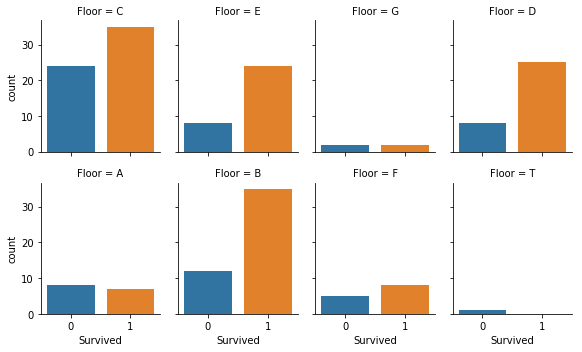

In [166]:
sns.catplot("Survived", col="Floor", col_wrap=4,
                    data=titanic_train[titanic_train.Floor.notnull()],
                    kind="count", height=2.5, aspect=.8)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


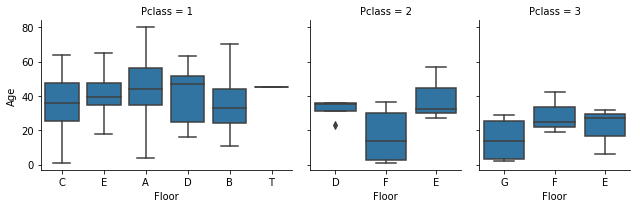

In [171]:
g = sns.FacetGrid(titanic_train, col="Pclass", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "Floor", "Age")

In [177]:
titanic_train['Floor'].fillna('Z',inplace=True)
titanic_test['Floor'].fillna('Z',inplace=True)
titanic_train['Floor'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

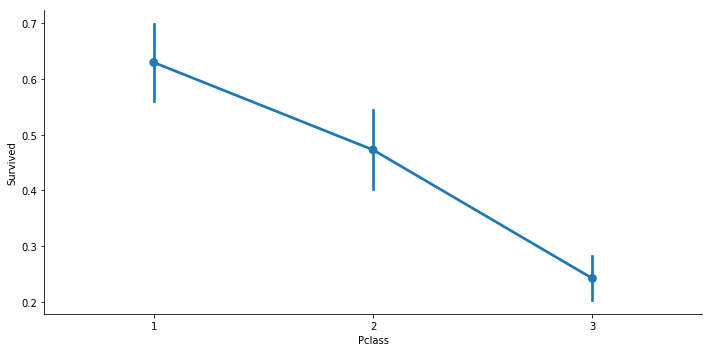

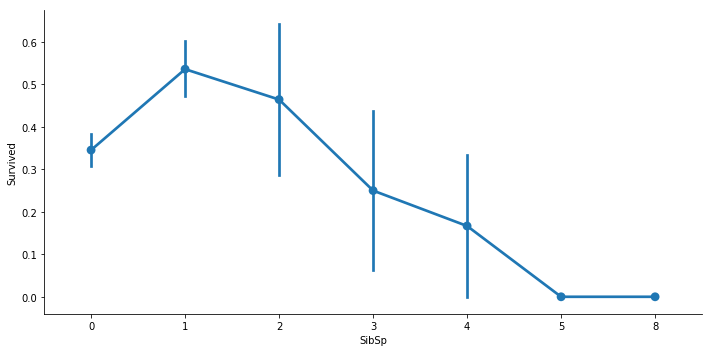

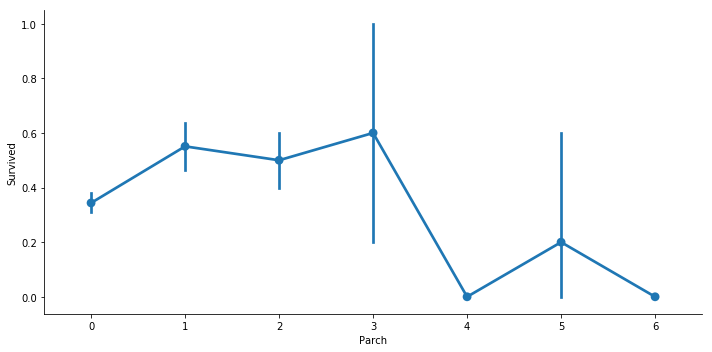

In [179]:
for col in ['Pclass','SibSp','Parch']:
    sns.catplot(x=col,y='Survived',data=titanic_train,kind='point',aspect=2) #vertical line shows the error

* It is found that the people having large family(Parch) and more siblings(Sibsp) were less likely to survive.
* Both SibSp and Parch showing somewhat similiar pattern. Hence, combining both features is a good practice

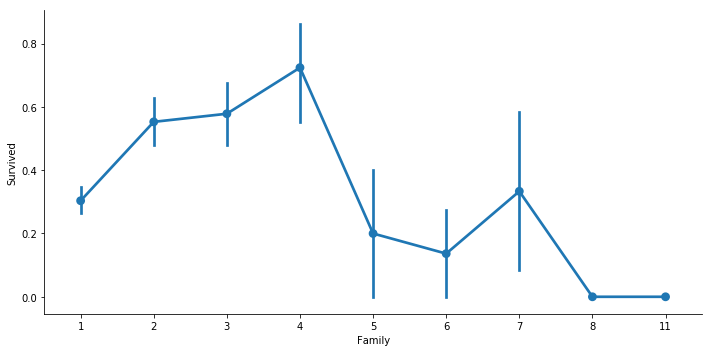

In [185]:
titanic_train['Family']= titanic_train['SibSp']+titanic_train['Parch']+1
titanic_test['Family']= titanic_test['SibSp']+titanic_test['Parch']+1
sns.catplot(x='Family',y='Survived',data=titanic_train,kind='point',aspect=2)

In [186]:
titanic_train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [7]:
#name,passengerid,sex,ticket,cabin,enbarked is not helpful here and are non-numeric.So,drop these
drop_things=['PassengerId','Name','Sex','Ticket','Cabin','Embarked']
titanic.drop(drop_things,axis=1,inplace=True)
#inplace=True means we don't wanna create new DF but do with same DF
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


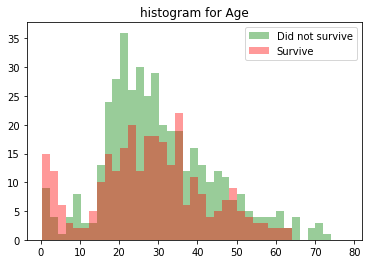

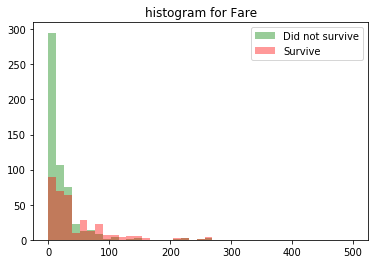

In [53]:
for i in ["Age","Fare"]:
    died= list(titanic[titanic["Survived"]==0][i].dropna())
    survived = list(titanic[titanic["Survived"]==1][i].dropna())
    xmin= min(min(died),min(survived))
    xmax=max(max(died),max(survived))
    width=(xmax-xmin)/40
    sns.distplot(died,color='g',kde=False,bins=np.arange(xmin,xmax,width))
    sns.distplot(survived,color='r',kde=False,bins=np.arange(xmin,xmax,width))
    plt.legend(['Did not survive','Survive'])        #to show the color for reperesentation in upper right box
    plt.title("histogram for {}".format(i))         #title of the histogram
    plt.show()

<Figure size 432x288 with 0 Axes>

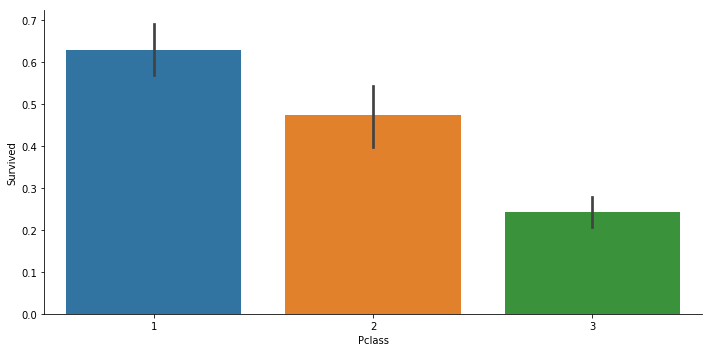

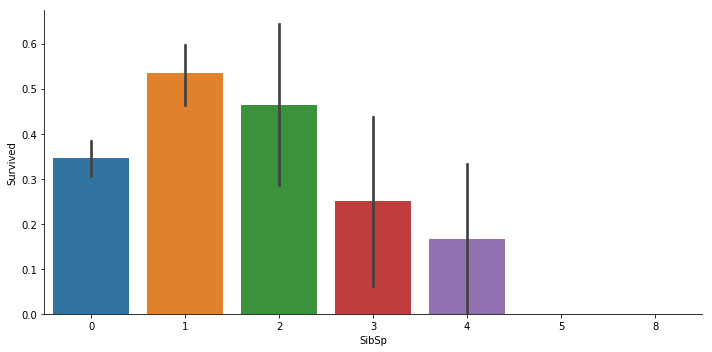

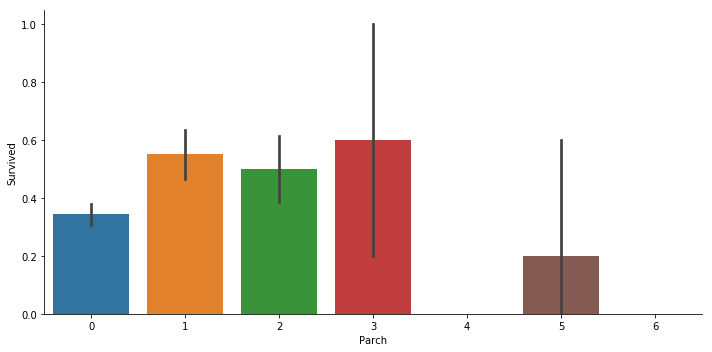

In [55]:
for index,col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(index)
    sns.catplot(x=col,y='Survived',data=titanic,kind='bar',aspect=2)